<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: <Title>
</div>

<h1 style="text-align:center;">Nhóm 23</h1>

# Thông tin nhóm: 

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>

## Giảng viên hướng dẫn:
Thầy Lê Nhựt Nam


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interact, widgets, VBox, HBox, Output
from datetime import datetime

## Đọc dữ liệu

In [2]:
# read data:
VCB_df = pd.read_csv("./Data/VCB Historical Data.csv") #Vietcombank
BID_df = pd.read_csv("./Data/BID Historical Data.csv") #BIDV
CTG_df = pd.read_csv("./Data/CTG Historical Data.csv") #ViettinBank
TCB_df = pd.read_csv("./Data/TCB Historical Data.csv") #Techcombank
AGR_df = pd.read_csv("./Data/AGR Historical Data.csv") #Agribank
VPB_df = pd.read_csv("./Data/VPB Historical Data.csv") #VPBank


## Tiền xử lý dữ liệu

In [3]:
# Hàm để chuyển đổi giá trị trong cột "Vol."
def convert_volume(vol_str):
    if vol_str.endswith('M'):
        return float(vol_str[:-1]) * 1000000
    elif vol_str.endswith('K'):
        return float(vol_str[:-1]) * 1000
    else:
        return float(vol_str)

def preprocessing(df):
    # Loại bỏ dấu phẩy từ cột Price, Open, High, Low
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
    # Sửa cột "Vol" trong DataFrame
    df['Vol.'] = df['Vol.'].apply(convert_volume)
    # Xoá các Records trước ngày 1/6/2018
    # Chuyển cột 'Date' thành kiểu datetime nếu cần thiết
    df['Date'] = pd.to_datetime(df['Date'])

    # Loại bỏ các dòng có ngày trước ngày 1/6/2018
    df = df[df['Date'] >= pd.Timestamp(2018, 6, 1)]

    return df

VCB_df = preprocessing(VCB_df)
BID_df = preprocessing(BID_df)
CTG_df = preprocessing(CTG_df)
TCB_df = preprocessing(TCB_df)
AGR_df = preprocessing(AGR_df)
VPB_df = preprocessing(VPB_df)


In [4]:
# Thêm cột "Stock symbol" với giá trị là Mã cổ phiếu tương ứng của ngân hàng
VCB_df['Stock symbol'] = 'VCB'
BID_df['Stock symbol'] = 'BID'
CTG_df['Stock symbol'] = 'CTG'
TCB_df['Stock symbol'] = 'TCB'
AGR_df['Stock symbol'] = 'AGR'
VPB_df['Stock symbol'] = 'VPB'

# Thêm cột "Bank" với giá trị tên ngân hàng tương ứng
VCB_df['Bank'] = 'Vietcombank'
BID_df['Bank'] = 'BIDV'
CTG_df['Bank'] = 'ViettinBank'
TCB_df['Bank'] = 'Techcombank'
AGR_df['Bank'] = 'Agribank'
VPB_df['Bank'] = 'VPBank'

# Gộp tất cả các DataFrame vào một DataFrame duy nhất
full_df = pd.concat([VCB_df, BID_df, CTG_df, TCB_df, AGR_df], ignore_index=True)

# Hiển thị một số dòng đầu của DataFrame kết quả
full_df

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
0,2024-05-20,91900.0,92000.0,98200.0,88700.0,1040000.0,0.11,VCB,Vietcombank
1,2024-05-17,91800.0,92700.0,93000.0,91700.0,1080000.0,-0.86,VCB,Vietcombank
2,2024-05-16,92600.0,92000.0,92700.0,91000.0,1710000.0,1.76,VCB,Vietcombank
3,2024-05-15,91000.0,90700.0,92700.0,84900.0,883100.0,0.23,VCB,Vietcombank
4,2024-05-14,90790.0,95000.0,96500.0,90500.0,818400.0,-0.23,VCB,Vietcombank
...,...,...,...,...,...,...,...,...,...
7448,2018-06-07,3641.7,3641.7,3651.5,3592.5,75800.0,0.82,AGR,Agribank
7449,2018-06-06,3612.1,3592.5,3631.8,3543.2,113340.0,0.55,AGR,Agribank
7450,2018-06-05,3592.5,3523.6,3631.8,3425.1,140590.0,4.89,AGR,Agribank
7451,2018-06-04,3425.1,3307.0,3425.1,3218.4,112900.0,6.75,AGR,Agribank


### chart


In [5]:
def candlestick_chart(df, banks, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Lọc dữ liệu theo ngày và ngân hàng
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Stock symbol'].isin(banks))]

    # Tạo biểu đồ nến cho mỗi ngân hàng
    fig = go.Figure()

    for bank in banks:
        bank_data = df_filtered[df_filtered['Stock symbol'] == bank]
        fig.add_trace(go.Candlestick(x=bank_data['Date'],
                                     open=bank_data['Open'],
                                     high=bank_data['High'],
                                     low=bank_data['Low'],
                                     close=bank_data['Price'],
                                     name=bank))


    fig.update_layout(title_text='Candlestick Chart', width=1200, height=800)
    # Hiển thị biểu đồ
    fig.show()


# Danh sách các ngân hàng
banks = ['VCB', 'BID', 'CTG', 'TCB', 'AGR','VPB']

candlestick_chart(full_df, banks, '01/01/2021', '12/31/2021')

Test


In [28]:
# Các màu tương phản cho các ngân hàng khác nhau
colors = {
    'VCB': ('#1f77b4', '#ff7f0e'),  # Blue and orange
    'BID': ('#2ca02c', '#d62728'),  # Green and red
    'CTG': ('#9467bd', '#8c564b'),  # Purple and brown
    'TCB': ('#e377c2', '#7f7f7f'),  # Pink and gray
    'AGR': ('#bcbd22', '#17becf'),  # Yellow-green and cyan
    'VPB': ('#ffbb78', '#1f77b4')   # Light orange and blue
}

# Danh sách các ngân hàng
all_banks = ['VCB', 'BID', 'CTG', 'TCB', 'AGR', 'VPB']

# Tạo biểu đồ nến cho mỗi ngân hàng
fig = go.Figure()

def candlestick_chart(df, start_date = '2018-06-01', end_date = '2024-05-20'):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Xoá dữ liệu cũ trên biểu đồ
    fig.data = []

    # Lọc dữ liệu theo ngày
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    for bank in all_banks:
        bank_data = df_filtered[df_filtered['Stock symbol'] == bank]
        if not bank_data.empty:
            fig.add_trace(go.Candlestick(
                x=bank_data['Date'],
                open=bank_data['Open'],
                high=bank_data['High'],
                low=bank_data['Low'],
                close=bank_data['Price'],
                name=bank,
                increasing_line_color=colors[bank][0],
                decreasing_line_color=colors[bank][1]
            ))

    fig.update_layout(title_text='Candlestick Chart for the Top 5 Valued Banks', xaxis_title="Time", yaxis_title="Price", width=1200, height=800)

# Hàm cập nhật biểu đồ
def update_chart(df,start_date = '2018-06-01', end_date = '2024-05-20'):
    candlestick_chart(df, start_date, end_date)
    fig.show()

# Sử dụng hàm để vẽ biểu đồ ban đầu
update_chart(full_df)

### SMA section for VCB


In [8]:
# def SMA(df, bank, period=30, column="Price"):
#     bank_df = df[df['Stock symbol'] == bank]  # Lọc dữ liệu cho ngân hàng cụ thể
#     return bank_df[column].rolling(window=period).mean()

# # Tạo cột mới 'SMA' trong DataFrame 'full_df' với dữ liệu của từng ngân hàng
# for bank in banks:
#     full_df.loc[full_df['Stock symbol'] == bank, 'SMA20'] = SMA(full_df, bank, period=20,column='Price')
#     full_df.loc[full_df['Stock symbol'] == bank, 'SMA50'] = SMA(full_df, bank, period=50,column='Price')

In [9]:
def SMA(df, period = 30, column = "Price"):
    return df[column].rolling(window=period).mean()

In [10]:
VCB_raw_df = VCB_df
VCB_df = VCB_df.set_index(pd.DatetimeIndex(VCB_df['Date'].values))
VCB_df


,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
2024-05-20,2024-05-20,91900.0,92000.0,98200.0,88700.0,1040000.0,0.11,VCB,Vietcombank
2024-05-17,2024-05-17,91800.0,92700.0,93000.0,91700.0,1080000.0,-0.86,VCB,Vietcombank
2024-05-16,2024-05-16,92600.0,92000.0,92700.0,91000.0,1710000.0,1.76,VCB,Vietcombank
2024-05-15,2024-05-15,91000.0,90700.0,92700.0,84900.0,883100.0,0.23,VCB,Vietcombank
2024-05-14,2024-05-14,90790.0,95000.0,96500.0,90500.0,818400.0,-0.23,VCB,Vietcombank
...,...,...,...,...,...,...,...,...,...
2018-06-07,2018-06-07,44505.0,44732.0,44960.0,44278.0,3240000.0,-0.68,VCB,Vietcombank
2018-06-06,2018-06-06,44808.0,44050.0,45263.0,43671.0,2790000.0,0.85,VCB,Vietcombank
2018-06-05,2018-06-05,44429.0,44429.0,45187.0,43747.0,4510000.0,-1.18,VCB,Vietcombank
2018-06-04,2018-06-04,44960.0,42837.0,45187.0,42458.0,4900000.0,4.04,VCB,Vietcombank


In [38]:
VCB_df['SMA20'] = SMA(VCB_df,period=20,column='Price')
VCB_df['SMA50'] = SMA(VCB_df,period=50,column='Price')

In [39]:
# Get signal for buy and sell

VCB_df['Signal'] = np.where (VCB_df["SMA20"]<VCB_df["SMA50"],1,0)
VCB_df['Position']= VCB_df['Signal'].diff()

VCB_df['Buy'] = np.where(VCB_df['Position']==1, VCB_df['Price'],np.NAN)
VCB_df['Sell'] = np.where(VCB_df['Position']==-1, VCB_df['Price'],np.NAN)


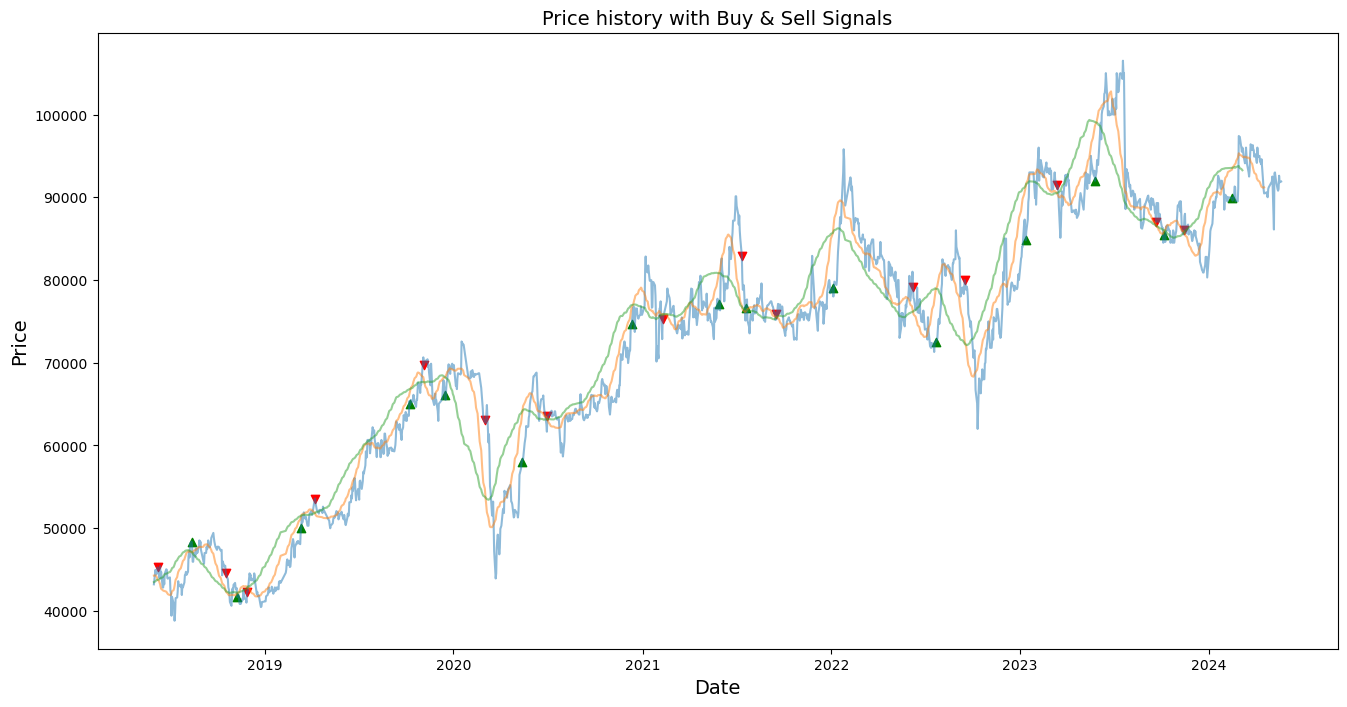

In [40]:
plt.figure(figsize=(16,8))
plt.title('Price history with Buy & Sell Signals',fontsize = 14)
plt.plot(VCB_df['Price'], alpha = 0.5, label = 'Price')
plt.plot(VCB_df['SMA20'], alpha = 0.5, label = 'SMA20')
plt.plot(VCB_df['SMA50'], alpha = 0.5, label = 'SMA50')

plt.scatter(VCB_df['Date'],VCB_df['Buy'],alpha = 1, label = 'Buy Signal', marker = '^',color = 'green')
plt.scatter(VCB_df['Date'],VCB_df['Sell'],alpha = 1, label = 'Sell Signal', marker = 'v',color = 'red')

plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price',fontsize=14)
plt.show()

In [36]:
VCB_df = VCB_raw_df
# Chuyển cột 'Date' thành index
VCB_df = VCB_df.set_index(pd.DatetimeIndex(VCB_df['Date'].values))

def SMA(df, period=30, column="Price"):
    return df[column].rolling(window=period).mean()

# Tính toán SMA và tạo tín hiệu mua/bán
VCB_df['SMA15'] = SMA(VCB_df, period=15, column='Price')
VCB_df['SMA60'] = SMA(VCB_df, period=60, column='Price')

VCB_df['Signal'] = np.where(VCB_df["SMA15"] < VCB_df["SMA60"], 1, 0)
VCB_df['Position'] = VCB_df['Signal'].diff()

VCB_df['Buy'] = np.where(VCB_df['Position'] == 1, VCB_df['Price'], np.nan)
VCB_df['Sell'] = np.where(VCB_df['Position'] == -1, VCB_df['Price'], np.nan)

# Tạo biểu đồ nến và điểm mua/bán
fig = go.Figure()

# Nến
fig.add_trace(go.Candlestick(x=VCB_df.index,
                             open=VCB_df['Open'],
                             high=VCB_df['High'],
                             low=VCB_df['Low'],
                             close=VCB_df['Price'],
                             name='Price',
                             opacity=0.7))

# Đường SMA20 (màu xanh dương)
fig.add_trace(go.Scatter(x=VCB_df.index,
                         y=VCB_df['SMA15'],
                         mode='lines',
                         name='SMA15',
                         line=dict(color='darkblue'))) 

# Đường SMA50 (màu cam)
fig.add_trace(go.Scatter(x=VCB_df.index,
                         y=VCB_df['SMA60'],
                         mode='lines',
                         name='SMA60',
                         line=dict(color='orange')))

# Điểm mua
fig.add_trace(go.Scatter(x=VCB_df.index[VCB_df['Position'] == 1],
                         y=VCB_df['Price'][VCB_df['Position'] == 1],
                         mode='markers',
                         marker=dict(symbol='triangle-up', color='green', size=15),
                         name='Buy Signal'))

# Điểm bán
fig.add_trace(go.Scatter(x=VCB_df.index[VCB_df['Position'] == -1],
                         y=VCB_df['Price'][VCB_df['Position'] == -1],
                         mode='markers',
                         marker=dict(symbol='triangle-down', color='red', size=15),
                         name='Sell Signal'))

# Cài đặt layout cho biểu đồ
fig.update_layout(title='Price history with Buy & Sell Signals for VCB',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  width=1400,  # Đặt chiều rộng của biểu đồ
                  height=900)  # Đặt chiều cao của biểu đồ

fig.show()


more model:

In [41]:
def MA(df, period=30, column="Price", ma_type="SMA"):
    """
    Calculate the moving average for a given column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    period (int): The window size for the moving average calculation (default is 30).
    column (str): The column name for which the moving average is to be calculated (default is "Price").
    ma_type (str): The type of moving average to calculate - "SMA", "EMA", "WMA", "TMA", "VWMA".

    Returns:
    pd.Series: A pandas Series containing the moving average values.
    """
    if ma_type == "SMA":
        return df[column].rolling(window=period).mean()
    elif ma_type == "EMA":
        return df[column].ewm(span=period, adjust=False).mean()
    elif ma_type == "WMA":
        weights = np.arange(1, period + 1)
        return df[column].rolling(window=period).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    elif ma_type == "TMA":
        sma = df[column].rolling(window=period).mean()
        return sma.rolling(window=period).mean()
    elif ma_type == "VWMA":
        volume = df['Volume'] if 'Volume' in df.columns else pd.Series(np.ones(len(df)), index=df.index)
        return (df[column] * volume).rolling(window=period).sum() / volume.rolling(window=period).sum()
    else:
        raise ValueError("Invalid ma_type. Use 'SMA', 'EMA', 'WMA', 'TMA', or 'VWMA'.")


In [42]:
df = VCB_df
# Calculate different moving averages
df['SMA30'] = MA(df, period=30, column='Price', ma_type='SMA')
df['EMA30'] = MA(df, period=30, column='Price', ma_type='EMA')
df['WMA30'] = MA(df, period=30, column='Price', ma_type='WMA')
df['TMA30'] = MA(df, period=30, column='Price', ma_type='TMA')
df['VWMA30'] = MA(df, period=30, column='Price', ma_type='VWMA')

# Create candlestick chart with different moving averages
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Price'],
                             name='Price',
                             opacity=0.7))

# SMA30
fig.add_trace(go.Scatter(x=df.index,
                         y=df['SMA30'],
                         mode='lines',
                         name='SMA30',
                         line=dict(color='blue')))

# EMA30
fig.add_trace(go.Scatter(x=df.index,
                         y=df['EMA30'],
                         mode='lines',
                         name='EMA30',
                         line=dict(color='orange')))

# WMA30
fig.add_trace(go.Scatter(x=df.index,
                         y=df['WMA30'],
                         mode='lines',
                         name='WMA30',
                         line=dict(color='green')))

# TMA30
fig.add_trace(go.Scatter(x=df.index,
                         y=df['TMA30'],
                         mode='lines',
                         name='TMA30',
                         line=dict(color='red')))

# VWMA30
fig.add_trace(go.Scatter(x=df.index,
                         y=df['VWMA30'],
                         mode='lines',
                         name='VWMA30',
                         line=dict(color='purple')))

# Update layout
fig.update_layout(title='Price History with Different Moving Averages for VCB',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  width=1400,
                  height=900)

fig.show()